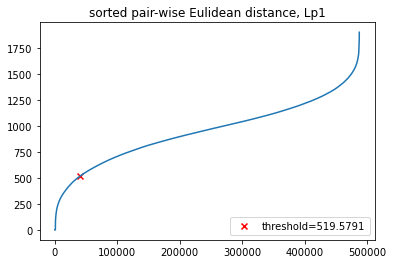

threshold value: 519.5791
edges preserved: 40698.0


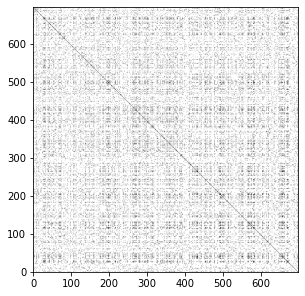

In [3]:
"""
this script is for 6740 2021Summer HW2-Q2

@author: PFC
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.spatial.distance import cdist

from sklearn.utils.graph_shortest_path import graph_shortest_path
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


# select LP norm
lp = 1
    

# Loading Data
images = loadmat('data/isomap.mat')['images']
#images=images_set2
(d, n) = np.shape(images)


# Generate Matrix for Similarity Graph
A = np.zeros([n,n])
if lp==1:
    A = cdist(images.T, images.T, 'cityblock')
else:
    A = cdist(images.T, images.T, 'euclidean')


# ### espilon-ISOMAP
Alist =np.sort(A.reshape(-1,)) # sorted all pair-wise distance

idx = n+40000
epsilon = Alist[idx] # the first n distances corrspond to the diagonal, i.e., the distance to the node itself, thus will be zero

plt.figure()
plt.plot(Alist)
plt.scatter(idx, epsilon, marker='x', c='r',label='threshold={:.4f}'.format(epsilon))
plt.title('sorted pair-wise Eulidean distance, Lp{}'.format(lp))
plt.legend(loc='lower right')
# plt.savefig('sorted-dist-lp{}.pdf'.format(lp))
plt.show()


# # find the epsilon nearest neighbor graph and enforce the symmetric matrix  
B = A<epsilon  
B = B|B.T     
B = B.astype('float')

print('threshold value: {:.4f}'.format(epsilon))
print('edges preserved: {}'.format(B.sum()))

G = A*B +99999.9*(1-B) # ## adding large number to indicate non-edge

#%% plot the adjacency matrix
# Plot the Adjacency Matrix by Intensity


fig_graph = plt.figure(constrained_layout=True)

gs_graph = gridspec.GridSpec(ncols=4, nrows=3, figure=fig_graph)

# ## show graph as an image
ax_graph = fig_graph.add_subplot(gs_graph[:,:3])
ax_graph.imshow(G,cmap=plt.get_cmap('gray'), extent=[0,698, 0, 698])
ax_graph.set_aspect('equal')







<ipython-input-10-ed974f0d42fc>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_graph1 = fig_graph.add_subplot(gs_graph[0,3])
<ipython-input-10-ed974f0d42fc>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_graph2 = fig_graph.add_subplot(gs_graph[1,3])
<ipython-input-10-ed974f0d42fc>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

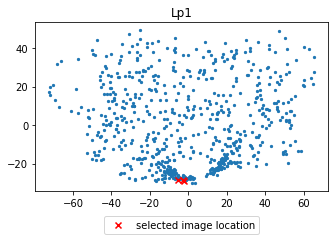

In [10]:
# ## randomly select some image
selected_random_img= np.array([12, 30, 40]) # image index
# ## display images
ax_graph.scatter(selected_random_img, 698-selected_random_img, marker='x',c='r')

img_graph1 = np.reshape(images[:,selected_random_img[0]], [64, -1]).T
img_graph2 = np.reshape(images[:,selected_random_img[1]], [64, -1]).T
img_graph3 = np.reshape(images[:,selected_random_img[2]], [64, -1]).T

ax_graph1 = fig_graph.add_subplot(gs_graph[0,3])
ax_graph2 = fig_graph.add_subplot(gs_graph[1,3])
ax_graph3 = fig_graph.add_subplot(gs_graph[2,3])

ax_graph1.imshow(img_graph1, cmap=plt.get_cmap('gray'))
ax_graph1.axis('off')
ax_graph2.imshow(img_graph2, cmap=plt.get_cmap('gray'))
ax_graph2.axis('off')
ax_graph3.imshow(img_graph3, cmap=plt.get_cmap('gray'))
ax_graph3.axis('off')

fig_graph.suptitle('Weighted Adjacency Matrix, Lp{}'.format(lp))
# fig_graph.savefig('Weighted-Adjacency-Matrix-Lp{}.pdf'.format(lp))

#%% embedding
D = graph_shortest_path(G)

# enforce symmetric due to the error fromeig the computing accuracy of the system
D = (D + D.T)/2

# Compute Matrix C
ones = np.ones([n,1])
H = np.eye(n) - 1/n*ones.dot(ones.T)
C = -H.dot(D**2).dot(H)/(2*n)  # here we normalize the magnitude by the nubmer of data point, this is only for the visualization purpose.

C = (C+C.T)/2
#print(np.max(C-C.T))
eig_val, eig_vec = np.linalg.eig(C)
eig_val = eig_val.real # to avoid numerical errs
eig_vec = eig_vec.real


eig_index = np.argsort(-eig_val) # Sort eigenvalue from large to small

# ## the 2-d embedding
Z = eig_vec[:,eig_index[0:2]].dot(np.diag(np.sqrt(eig_val[eig_index[0:2]])))

#%%
fig = plt.figure(constrained_layout=True)

gs = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)

# Plot Embedding
ax0 = fig.add_subplot(gs[:,:3])

index = np.argsort(Z[:,1])[4:7] # ## find three image close to each other

ax0.scatter(Z[:,0], Z[:,1], s = 5)
ax0.scatter(Z[index,0],Z[index,1], marker='x', c='red', label='selected image location')
ax0.set_title('Lp{}'.format(lp))
ax0.legend(bbox_to_anchor=(0.5, -0.2), loc='center', borderaxespad=0.1)
ax0.set_aspect('equal')


<ipython-input-9-b660679dfcc4>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(gs[0,3])
<ipython-input-9-b660679dfcc4>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(gs[1,3])
<ipython-input-9-b660679dfcc4>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

Text(0.5, 1.0, 'PCA')

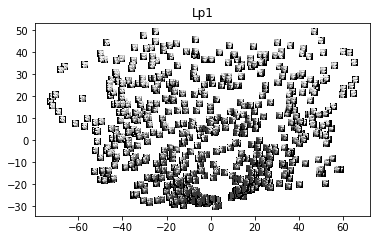

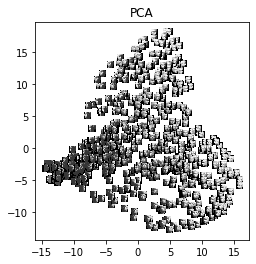

In [9]:
# ## display images
img_1 = np.reshape(images[:,index[0]], [64, -1]).T
img_2 = np.reshape(images[:,index[1]], [64, -1]).T
img_3 = np.reshape(images[:, index[2]], [64, -1]).T

ax1 = fig.add_subplot(gs[0,3])
ax2 = fig.add_subplot(gs[1,3])
ax3 = fig.add_subplot(gs[2,3])

ax1.imshow(eval('img_'+str(1)), cmap=plt.get_cmap('gray'))
ax1.axis('off')
ax2.imshow(eval('img_'+str(2)), cmap=plt.get_cmap('gray'))
ax2.axis('off')
ax3.imshow(eval('img_'+str(3)), cmap=plt.get_cmap('gray'))
ax3.axis('off')

# fig.savefig('lp{}-result.pdf'.format(lp))


#%%  show all faces on scatter plot

 
figx, axx= plt.subplots()
axx.scatter(Z[:,0], Z[:,1], s = 5)
axx.set_aspect('equal')
x,y=(64,64)
for ii in range(n):
    img = images[:,ii].reshape(x,y).T
    img = OffsetImage(img, cmap='gray', zoom=0.1) 
    axx.add_artist(AnnotationBbox(img, (Z[ii,0],Z[ii,1]),frameon=False))
axx.set_title('Lp{}'.format(lp))
# figx.savefig('all-images-lp{}.pdf'.format(lp),dpi=300)    



#%% with PCA
mu = images.mean(axis=1).reshape(-1,1)
demean = images - mu
v,s,_ = np.linalg.svd(demean)
Zpca = demean.T @ v[:,:2] 

figpca, axpca= plt.subplots()
axpca.scatter(Zpca[:,0], Zpca[:,1], s = 5)
axpca.set_aspect('equal')

for ii in range(n):
    img = images[:,ii].reshape(64,64).T
    img = OffsetImage(img, cmap='gray', zoom=0.1) 
    axpca.add_artist(AnnotationBbox(img, (Zpca[ii,0],Zpca[ii,1]),frameon=False))
axpca.set_title('PCA')
# figpca.savefig('all-images-pca.pdf',dpi=300)  

In [12]:
images = loadmat('data/isomap.mat')['images']
images[0].shape

(698,)

In [43]:

import os
import glob
import numpy as np
import image_slicer
from scipy.ndimage import gaussian_filter
from skimage import io
from skimage import img_as_float
from skimage.morphology import reconstruction
from skimage.io import imread
from itertools import combinations

image_path ='data/vinexample.jpg'
N = 50 # number of slices
dir = "data/image"


def filtered_image(image):
    image1 = image
    image_temp = gaussian_filter(img_as_float(image),1)
    seed = np.copy(image_temp)
    seed[1:-1, 1:-1] = image_temp.min()
    mask = image_temp    
    image2 = reconstruction(seed, mask, method='dilation')
    img3 =  image1-image2
    io.imsave("out.png", img3)
    return "out.png"

sliced_images = image_slicer.slice(filtered_image(imread(image_path)),N, save=False)

from PIL import ImageDraw, ImageFont
for tile in sliced_images:
    overlay = ImageDraw.Draw(tile.image)
    overlay.text((5, 5), str(tile.number), (255, 255, 255),
                 ImageFont.load_default())




Lossy conversion from float64 to uint8. Range [12.931727812129893, 254.56886329023823]. Convert image to uint8 prior to saving to suppress this warning.


In [44]:
from PIL import Image
from numpy import asarray
images_set=[]
print(asarray(sliced_images[0].image.convert('L'))/255)
for i in range(0,len(sliced_images)):
    
    images_set.append(asarray(sliced_images[i].image.convert('L'))/255)
images_set=[]

[[0.88235294 0.88235294 0.87843137 ... 0.29411765 0.25882353 0.25098039]
 [0.88627451 0.88235294 0.87843137 ... 0.32156863 0.29411765 0.27843137]
 [0.88627451 0.88627451 0.88235294 ... 0.34509804 0.31372549 0.29803922]
 ...
 [0.84313725 0.83921569 0.84313725 ... 0.23137255 0.23921569 0.24313725]
 [0.84313725 0.84313725 0.84705882 ... 0.23529412 0.23137255 0.24313725]
 [0.84313725 0.84313725 0.84705882 ... 0.24705882 0.22352941 0.21568627]]


In [45]:
images_set2=[]
x,y=images_set[0].shape
l=x*y
for i in images_set:
    images_set2.append(i.reshape(l,).tolist())
images_set2=np.array(images_set2)  
images_set2

array([[0.88235294, 0.88235294, 0.87843137, ..., 0.24705882, 0.22352941,
        0.21568627],
       [0.2627451 , 0.2627451 , 0.27843137, ..., 0.12941176, 0.1254902 ,
        0.12156863],
       [0.3254902 , 0.3372549 , 0.32941176, ..., 0.23921569, 0.22745098,
        0.21568627],
       ...,
       [0.50980392, 0.51372549, 0.49019608, ..., 0.20392157, 0.2       ,
        0.17647059],
       [0.44313725, 0.43529412, 0.42745098, ..., 0.16862745, 0.17254902,
        0.16862745],
       [0.43529412, 0.42352941, 0.41568627, ..., 0.96862745, 0.99215686,
        0.97647059]])

In [47]:
images.shape
images_set2.shape

(56, 12928)